In [67]:
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn 
import math
import sklearn.datasets 
from sklearn.utils import shuffle
from random import randint
from numpy import random
import matplotlib.patches as mpatches
import matplotlib 
%matplotlib inline

batch_size = 40 # !!!

def split_train_test(X, y):
    datasize = X.shape[0]
    X, y = shuffle(X, y, random_state = randint(0, 100))
    train_X = X[batch_size:]
    train_y = y[batch_size:]
    test_X = X[:batch_size]
    test_y = y[:batch_size]
    return [train_X, train_y, test_X, test_y]

def normalize(X):
    m = np.amin(X, axis=0)
    M = np.amax(X, axis=0)
    return np.array([(x-m)/(M-m) for x in X])

dataset = sklearn.datasets.load_diabetes()
dataset_X = np.array(dataset['data'])
dataset_y = np.array(dataset['target'])
train_X, train_y, test_X, test_y = split_train_test( normalize(dataset_X), normalize(dataset_y))

print("datasets:",dataset_X.shape, dataset_y.shape)


datasets: (442, 10) (442,)


In [81]:

class NeuNet():
    
    def __init__(self, nn_inputs, nn_layers, nn_hidden, nn_outputs, learning_rate):
        self.nn_inputs = nn_inputs
        self.nn_layers = nn_layers
        self.neurons_per_layer = [nn_inputs] + nn_hidden + [nn_outputs]
        self.nn_outputs = nn_outputs
        self.eta = learning_rate
        
        self.W=[]
        self.b=[]
        self.a=[]
        self.h=[]
        self.delta=[]   
        self.yhat=[]
        
        for i in range(self.nn_layers+1):
            self.W.append(np.random.normal(0,1,(self.neurons_per_layer[i+1], self.neurons_per_layer[i])))
            self.b.append(np.random.normal(0,1,(self.neurons_per_layer[i+1], batch_size)))
            self.a.append(np.zeros((self.neurons_per_layer[i], batch_size)))
            self.h.append(np.zeros((self.neurons_per_layer[i], batch_size)))
            self.delta.append(np.zeros((self.neurons_per_layer[i], batch_size)))
            
        self.a.append(np.zeros((self.neurons_per_layer[nn_layers+1], batch_size)))
        self.h.append(np.zeros((self.neurons_per_layer[nn_layers+1], batch_size)))
        self.delta.append(np.zeros((self.neurons_per_layer[nn_layers+1], batch_size)))
                  
        print("network:",self.neurons_per_layer)
        print("W", [x.shape for x in self.W])
        print("b", [x.shape for x in self.b])
        print("a", [x.shape for x in self.a])
        print("h", [x.shape for x in self.h])
        print("delta", [x.shape for x in self.delta])
    

    def sigmoid(self, x): return 1/(1 + np.exp(-x))
    def sigmoid_der(self, x): return np.exp(-x)/(1 + np.exp(-x))**2
    
    def get_error(self, y):
        return sum( (y - self.h[-1]).T **2) # /len(y) ~ batch_size
    
    
    def forward_prop(self, X):
        
        self.a[0] = X.T
        self.h[0] = X.T
        
        for i in range(1,self.nn_layers+2):
            self.a[i] = self.W[i-1].dot( self.h[i-1]) + self.b[i-1]
            self.h[i] = self.sigmoid( self.a[i])

        
    def backward_prop(self, y):

        self.delta[-1] = (y - self.h[-1])
        
        for i in range(self.nn_layers,0,-1):
            self.delta[i] = np.dot( self.W[i].T, self.delta[i+1]) * self.sigmoid_der( self.a[i])

            self.W[i] = -self.eta * np.dot( self.delta[i+1], self.h[i].T)
            self.b[i] = -self.eta * self.delta[i+1]


network: [10, 3, 3, 1]
W [(3, 10), (3, 3), (1, 3)]
b [(3, 40), (3, 40), (1, 40)]
a [(10, 40), (3, 40), (3, 40), (1, 40)]
h [(10, 40), (3, 40), (3, 40), (1, 40)]
delta [(10, 40), (3, 40), (3, 40), (1, 40)]


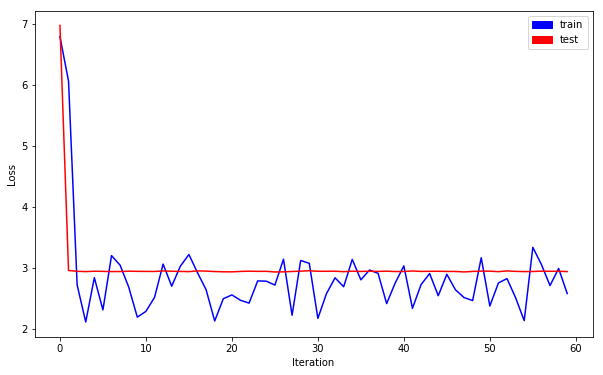

In [82]:
no_runs = 30
neunet = NeuNet(nn_inputs = 10, nn_layers = 2, nn_hidden = [3,3], nn_outputs = 1, learning_rate = 0.001)

train_err = []
test_err = []

for it in range(no_runs):
    
    train_X, train_y = shuffle(train_X, train_y, random_state = randint(0, 100))
    
    for i in range(0, len(train_X), batch_size):
        if i+batch_size < len(train_X):
            
            if it%5 == 0:
                train_err.append( neunet.get_error( train_y[i:(i+batch_size)]))
                neunet.forward_prop(test_X)
                test_err.append( neunet.get_error( test_y))
#                 print(train_err[-1], test_err[-1])

            neunet.forward_prop(train_X[i:(i+batch_size)])
            neunet.backward_prop(train_y[i:(i+batch_size)])
            
plt.figure(figsize=(10,6))
plt.plot(train_err, color = 'b')
plt.plot(test_err, color = 'r')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend(handles=[mpatches.Patch(color='blue', label='train'), mpatches.Patch(color='red', label='test')])